# Введение в PyTorch
Семинар основан на материалах [ноутбука](https://github.com/hse-ds/iad-deep-learning/blob/master/2021/seminars/sem01/sem01.ipynb) майнора ВШЭ ["Основы глубинного обучения"](https://github.com/hse-ds/iad-deep-learning).

## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [ ]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.03248492, 0.15388101, 0.85091762],
       [0.0265083 , 0.56123781, 0.41628642],
       [0.36507928, 0.22205422, 0.20415548],
       [0.29424227, 0.62927881, 0.8339611 ],
       [0.35680175, 0.85647921, 0.20385715]])

In [ ]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [ ]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.03248492 5.15388101 5.85091762]
 [5.0265083  5.56123781 5.41628642]
 [5.36507928 5.22205422 5.20415548]
 [5.29424227 5.62927881 5.8339611 ]
 [5.35680175 5.85647921 5.20385715]]


In [ ]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.74879544 0.44145042 0.219749   0.81602469 0.31685221]
 [0.44145042 0.48898496 0.21929001 0.70814161 0.57500969]
 [0.219749   0.21929001 0.22427042 0.4174135  0.36206431]
 [0.81602469 0.70814161 0.4174135  1.17806145 0.81395931]
 [0.31685221 0.57500969 0.36206431 0.81395931 0.90242186]]


In [ ]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.34576119 0.33467751 0.26376299 0.58582739 0.47237937]


In [ ]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [55]:
np.sum(np.power(np.arange(1,1001),2))# YOUR CODE

333833500

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [56]:
x = torch.rand(5, 3)
x

tensor([[0.0614, 0.1782, 0.1540],
        [0.1063, 0.9865, 0.1708],
        [0.5955, 0.2922, 0.4722],
        [0.9317, 0.7232, 0.6285],
        [0.0072, 0.0891, 0.0829]])

In [57]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [58]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.0614, 5.1782, 5.1540],
        [5.1063, 5.9865, 5.1708],
        [5.5955, 5.2922, 5.4722],
        [5.9317, 5.7232, 5.6285],
        [5.0072, 5.0891, 5.0829]])


In [59]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[0.0593, 0.2086, 0.1613, 0.2829, 0.0291],
        [0.2086, 1.0136, 0.4321, 0.9198, 0.1028],
        [0.1613, 0.4321, 0.6629, 1.0629, 0.0695],
        [0.2829, 0.9198, 1.0629, 1.7862, 0.1233],
        [0.0291, 0.1028, 0.0695, 0.1233, 0.0149]])

X X^T  (2):
tensor([[0.0593, 0.2086, 0.1613, 0.2829, 0.0291],
        [0.2086, 1.0136, 0.4321, 0.9198, 0.1028],
        [0.1613, 0.4321, 0.6629, 1.0629, 0.0695],
        [0.2829, 0.9198, 1.0629, 1.7862, 0.1233],
        [0.0291, 0.1028, 0.0695, 0.1233, 0.0149]])


In [60]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.1312, 0.4212, 0.4533, 0.7612, 0.0597])


In [61]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [63]:
torch.sum(torch.pow(torch.arange(1,1001),2))# YOUR CODE

tensor(333833500)

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [64]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[ 2.9162e+06,  3.0687e-41, -1.0842e-19],
        [ 1.7106e+00,  0.0000e+00,  1.7266e+00],
        [-1.0842e-19,  1.8153e+00,  3.6893e+19],
        [ 1.3640e+00,  5.7232e+00,  5.6285e+00],
        [ 5.0072e+00,  5.0891e+00,  5.0829e+00]])


In [65]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.6224, 0.3294, 0.4351],
        [0.6201, 0.4529, 0.6824],
        [0.8480, 0.3831, 0.6293],
        [0.1262, 0.1394, 0.9128],
        [0.9436, 0.3321, 0.6264]])


In [66]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [67]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [68]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [69]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[-0.3485, -0.8401,  2.2605],
        [ 0.4743,  0.2736,  0.9705],
        [-0.1582,  0.8271,  0.0976],
        [-0.0621,  0.0062,  2.0235],
        [ 0.9371, -0.5543, -0.6910]]) torch.Size([5, 3])


In [70]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[0.0940, 0.1522, 3.1604],
        [1.4235, 1.0795, 0.9984],
        [0.5571, 1.7874, 0.2600],
        [0.5566, 0.9874, 2.8690],
        [1.0957, 0.3517, 0.2387]])


In [71]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[0.0940, 0.1522, 3.1604],
        [1.4235, 1.0795, 0.9984],
        [0.5571, 1.7874, 0.2600],
        [0.5566, 0.9874, 2.8690],
        [1.0957, 0.3517, 0.2387]])


In [72]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[0.0940, 0.1522, 3.1604],
        [1.4235, 1.0795, 0.9984],
        [0.5571, 1.7874, 0.2600],
        [0.5566, 0.9874, 2.8690],
        [1.0957, 0.3517, 0.2387]])


In [73]:
print(x * y)  # поэлементное умножение

tensor([[-0.1542, -0.8336,  2.0343],
        [ 0.4502,  0.2205,  0.0271],
        [-0.1132,  0.7943,  0.0159],
        [-0.0384,  0.0061,  1.7108],
        [ 0.1486, -0.5022, -0.6425]])


In [74]:
print(x @ y.t())  # матричное умножение

tensor([[ 1.0465, -0.9448, -0.6889,  0.8712,  1.2852],
        [ 1.3548,  0.6978,  0.7597,  1.3825,  1.2254],
        [ 0.8386,  0.5190,  0.6969,  0.7962,  0.8150],
        [ 1.7998,  0.0025,  0.2902,  1.6785,  1.8771],
        [-0.7572,  0.4236,  0.0258, -0.5483, -0.9961]])


In [75]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[ 1.0465, -0.9448, -0.6889,  0.8712,  1.2852],
        [ 1.3548,  0.6978,  0.7597,  1.3825,  1.2254],
        [ 0.8386,  0.5190,  0.6969,  0.7962,  0.8150],
        [ 1.7998,  0.0025,  0.2902,  1.6785,  1.8771],
        [-0.7572,  0.4236,  0.0258, -0.5483, -0.9961]])


In [76]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [77]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [78]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

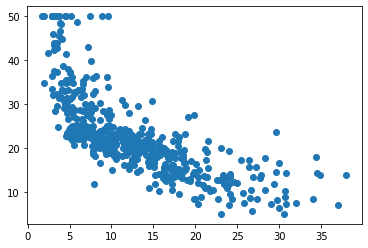

In [84]:
import pickle
boston = pickle.load(open('boston.pkl','rb'))
#boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target);

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

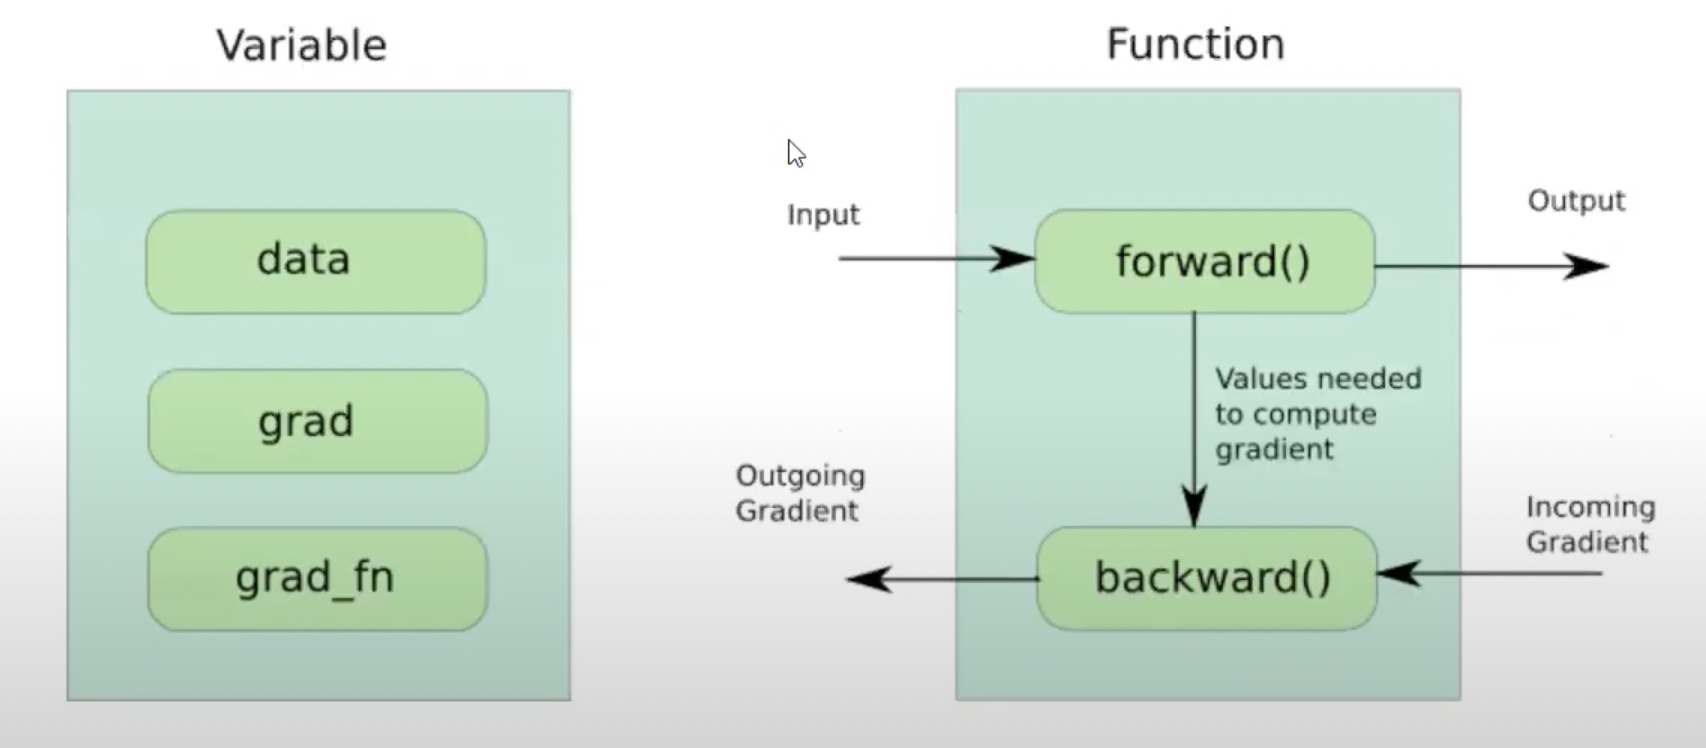

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [85]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [86]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [87]:
# сделали операции и посчитали градиенты, значение должно было появится
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.6842])
dL/db = 
 tensor([-42.8588])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [93]:
w.data

tensor([0.7250])

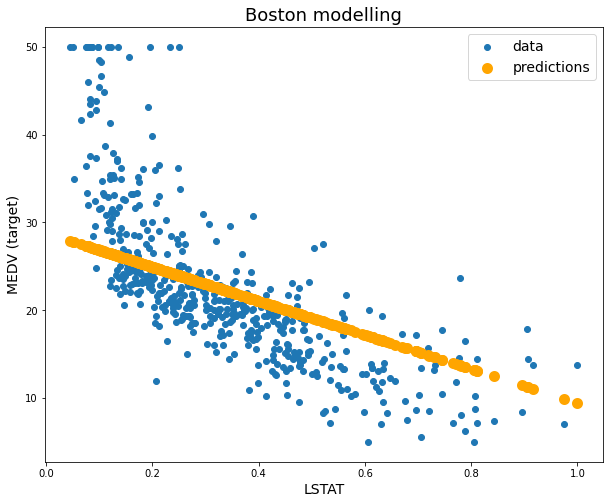

loss =  48.369694


In [94]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad# YOUR CODE
    b.data -=  0.05 * b.grad# YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [ ]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [ ]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [ ]:
our_dataset = RandomDataset(x, y)

In [ ]:
our_dataset.__getitem__(1)

{'sample': tensor([0.0014, 0.6675, 0.7346, 0.3993, 0.8430]),
 'target': 0.02229844692699212}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [ ]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [ ]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.7752, 0.9308, 0.7423, 0.0085, 0.8056],
        [0.0014, 0.6675, 0.7346, 0.3993, 0.8430],
        [0.8760, 0.8010, 0.6122, 0.8481, 0.1517],
        [0.8861, 0.7822, 0.8659, 0.4742, 0.7104]])
Target:
tensor([0.2595, 0.0223, 0.6587, 0.3863], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [ ]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [ ]:
y_pred = model(batch['sample']) # получили предсказания модели

Слой Dropout можно задать следующим образом:

```
nn.Dropout()
```

Посмотрим на документацию слоя:
```
Args:
    p: probability of an element to be zeroed. Default: 0.5
    inplace: If set to ``True``, will do this operation in-place. Default: ``False``

Shape:
    - Input: :math:`(*)`. Input can be of any shape
    - Output: :math:`(*)`. Output is of the same shape as input

Examples::

    >>> m = nn.Dropout(p=0.2)
    >>> input = torch.randn(20, 16)
    >>> output = m(input)
```




#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [97]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

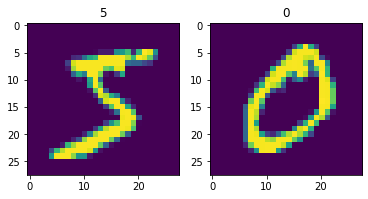

In [98]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [99]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [100]:
[x for x in model.named_parameters()] 

[('1.weight', Parameter containing:
  tensor([[-0.0239,  0.0291, -0.0197,  ...,  0.0319,  0.0083,  0.0163],
          [ 0.0180,  0.0026,  0.0010,  ...,  0.0285, -0.0028,  0.0234],
          [-0.0279, -0.0059,  0.0049,  ..., -0.0039, -0.0288,  0.0041],
          ...,
          [-0.0082,  0.0151, -0.0131,  ...,  0.0282, -0.0192, -0.0143],
          [ 0.0140,  0.0298,  0.0158,  ...,  0.0117,  0.0196, -0.0272],
          [-0.0278, -0.0050,  0.0121,  ..., -0.0263, -0.0349, -0.0060]],
         requires_grad=True)), ('1.bias', Parameter containing:
  tensor([ 0.0132, -0.0266,  0.0102, -0.0225,  0.0184,  0.0298, -0.0024, -0.0176,
          -0.0021,  0.0062, -0.0056,  0.0306,  0.0302, -0.0266,  0.0328, -0.0075,
           0.0260,  0.0019,  0.0106,  0.0045, -0.0250,  0.0247, -0.0227,  0.0252,
           0.0070, -0.0044, -0.0206,  0.0247, -0.0354, -0.0129, -0.0225,  0.0229,
          -0.0203,  0.0144, -0.0150,  0.0285,  0.0159,  0.0038,  0.0140, -0.0056,
           0.0181, -0.0163, -0.0232, -0.02

Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [101]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.11726242303848267, accuracy: 0.9659


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.09927936643362045, accuracy: 0.9699


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08466602861881256, accuracy: 0.9761


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)